In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spice
import matplotlib.pyplot as plt 
import spiceypy as spice
import rebound

In [2]:
spice.furnsh("bc_ops.tm")

In [3]:
print("SPK objects:")
for i in range(spice.ktotal("SPK")):
    path, _, _, _ = spice.kdata(i, "SPK")
    ids = spice.spkobj(path)
    for obj_id in ids:
        name = spice.bodc2n(obj_id)
        print(obj_id, name, path)

SPK objects:
1 MERCURY BARYCENTER ../spk/de432s.bsp
2 VENUS BARYCENTER ../spk/de432s.bsp
3 EARTH BARYCENTER ../spk/de432s.bsp
4 MARS BARYCENTER ../spk/de432s.bsp
5 JUPITER BARYCENTER ../spk/de432s.bsp
6 SATURN BARYCENTER ../spk/de432s.bsp
7 URANUS BARYCENTER ../spk/de432s.bsp
8 NEPTUNE BARYCENTER ../spk/de432s.bsp
9 PLUTO BARYCENTER ../spk/de432s.bsp
10 SUN ../spk/de432s.bsp
199 MERCURY ../spk/de432s.bsp
299 VENUS ../spk/de432s.bsp
301 MOON ../spk/de432s.bsp
399 EARTH ../spk/de432s.bsp
399013 DSS-13 ../spk/earthstns_itrf93_201023.bsp
399014 DSS-14 ../spk/earthstns_itrf93_201023.bsp
399015 DSS-15 ../spk/earthstns_itrf93_201023.bsp
399024 DSS-24 ../spk/earthstns_itrf93_201023.bsp
399025 DSS-25 ../spk/earthstns_itrf93_201023.bsp
399026 DSS-26 ../spk/earthstns_itrf93_201023.bsp
399034 DSS-34 ../spk/earthstns_itrf93_201023.bsp
399035 DSS-35 ../spk/earthstns_itrf93_201023.bsp
399036 DSS-36 ../spk/earthstns_itrf93_201023.bsp
399043 DSS-43 ../spk/earthstns_itrf93_201023.bsp
399045 DSS-45 ../sp

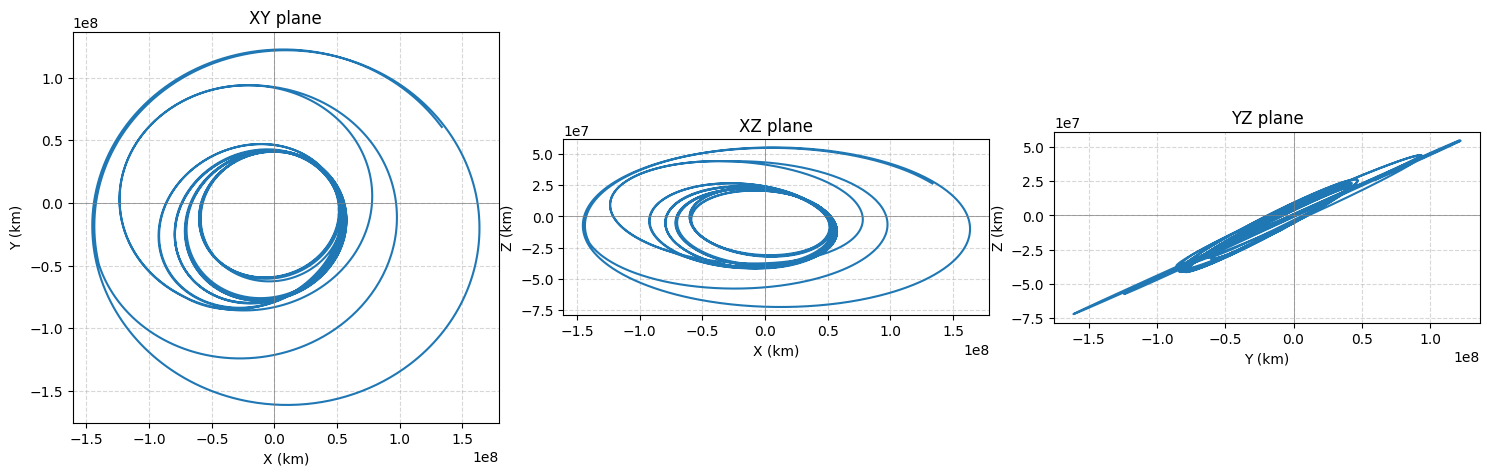

In [4]:
# Hardcoded limits: from 2018-10-20 to 2025-11-01
t_start = spice.utc2et("2018-10-20T00:00:00")
t_stop  = spice.utc2et("2025-11-01T00:00:00")

step = 86400  # seconds

ets = []
xyz = []

# Sample heliocentric XYZ (J2000 frame)
for et in np.arange(t_start, t_stop, step):
                        #obj    #time  frame   corrections  source
    pos, _ = spice.spkpos("MPO", et, "J2000", "NONE", "SUN")
    ets.append(et)
    xyz.append(pos)

xyz = np.array(xyz)
utc = np.array([spice.et2utc(et, "ISOC", 0) for et in ets])


X, Y, Z = xyz.T

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].plot(X, Y)
ax[0].set_xlabel("X (km)")
ax[0].set_ylabel("Y (km)")
ax[0].set_title("XY plane")

# XZ plane
ax[1].plot(X, Z)
ax[1].set_xlabel("X (km)")
ax[1].set_ylabel("Z (km)")
ax[1].set_title("XZ plane")

# YZ plane
ax[2].plot(Y, Z)
ax[2].set_xlabel("Y (km)")
ax[2].set_ylabel("Z (km)")
ax[2].set_title("YZ plane")

for a in ax:
    a.set_aspect("equal", "box")
    a.grid(True, linestyle="--", alpha=0.5)
    a.axhline(0, color="gray", linewidth=0.5)
    a.axvline(0, color="gray", linewidth=0.5)

plt.tight_layout()
plt.show()


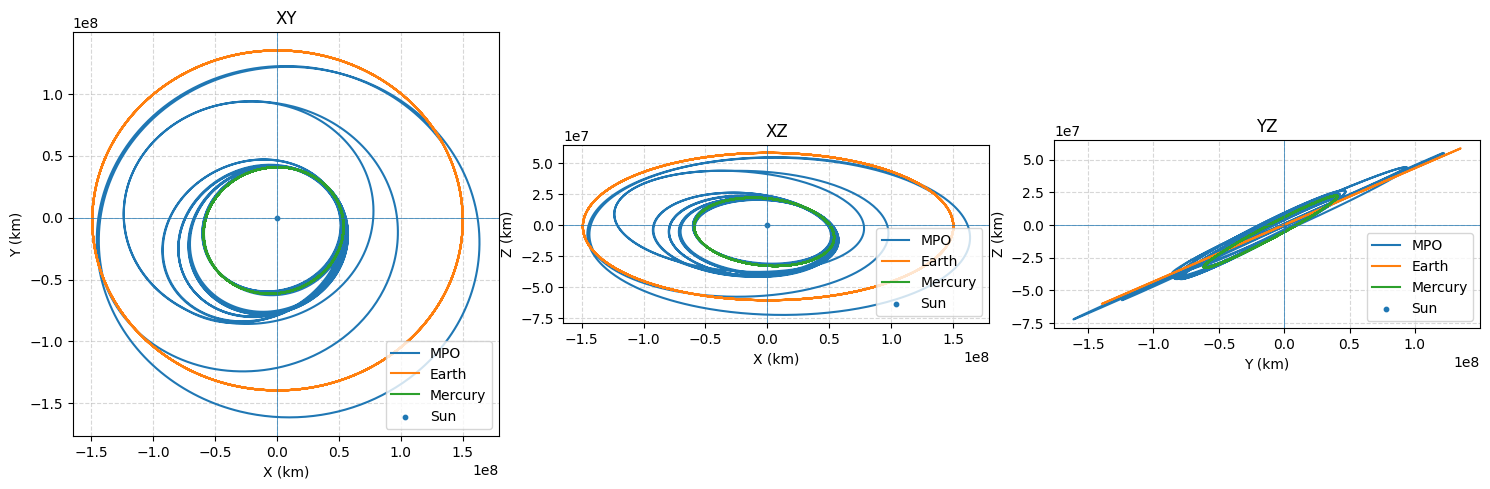

In [5]:
# Hardcoded limits: from 2018-10-20 to 2025-11-01
t_start = spice.utc2et("2018-10-20T00:00:00")
t_stop  = spice.utc2et("2025-11-01T00:00:00")
step = 86400  # 1 day in seconds

ets = np.arange(t_start, t_stop, step)

# helper to get heliocentric XYZ for a body name
def helio_xyz(name):
    out = []
    for et in ets:
        pos, _ = spice.spkpos(name, et, "J2000", "NONE", "SUN")
        out.append(pos)
    return np.array(out)

# MPO, Earth, Mercury (heliocentric, J2000)
xyz_mpo     = helio_xyz("MPO")
xyz_earth   = helio_xyz("EARTH")
xyz_mercury = helio_xyz("MERCURY")

# time labels if you want them later
utc = np.array([spice.et2utc(et, "ISOC", 0) for et in ets])

# unpack
Xm, Ym, Zm = xyz_mpo.T
Xe, Ye, Ze = xyz_earth.T
Xme, Yme, Zme = xyz_mercury.T  # 'me' = mercury

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

# XY
ax[0].plot(Xm, Ym, label="MPO")
ax[0].plot(Xe, Ye, label="Earth")
ax[0].plot(Xme, Yme, label="Mercury")
ax[0].scatter([0], [0], s=10, label="Sun")
ax[0].set_xlabel("X (km)"); ax[0].set_ylabel("Y (km)"); ax[0].set_title("XY")

# XZ
ax[1].plot(Xm, Zm, label="MPO")
ax[1].plot(Xe, Ze, label="Earth")
ax[1].plot(Xme, Zme, label="Mercury")
ax[1].scatter([0], [0], s=10, label="Sun")
ax[1].set_xlabel("X (km)"); ax[1].set_ylabel("Z (km)"); ax[1].set_title("XZ")

# YZ
ax[2].plot(Ym, Zm, label="MPO")
ax[2].plot(Ye, Ze, label="Earth")
ax[2].plot(Yme, Zme, label="Mercury")
ax[2].scatter([0], [0], s=10, label="Sun")
ax[2].set_xlabel("Y (km)"); ax[2].set_ylabel("Z (km)"); ax[2].set_title("YZ")

for a in ax:
    a.set_aspect("equal", "box")
    a.grid(True, linestyle="--", alpha=0.5)
    a.axhline(0, linewidth=0.5)
    a.axvline(0, linewidth=0.5)
    a.legend(loc="best")

plt.tight_layout()
plt.show()


In [6]:
utc = np.array(utc, dtype='datetime64')


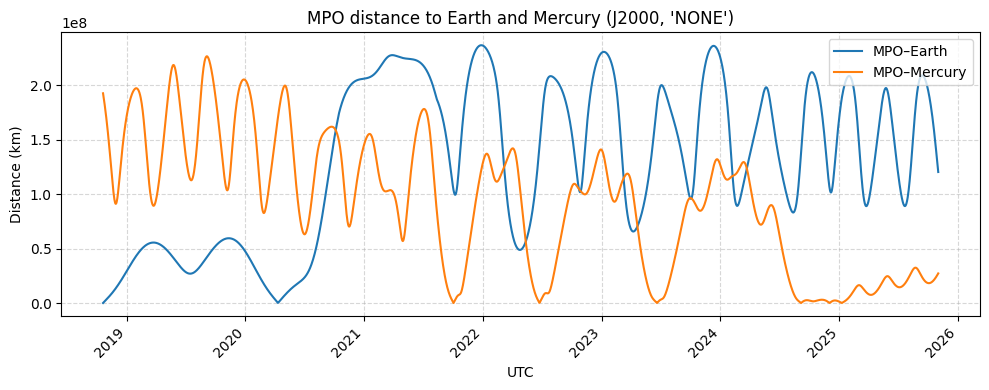

In [7]:
# Distances (km) using the heliocentric positions you already computed
d_mpo_earth   = np.linalg.norm(xyz_mpo - xyz_earth,   axis=1)
d_mpo_mercury = np.linalg.norm(xyz_mpo - xyz_mercury, axis=1)

plt.figure(figsize=(10,4))
plt.plot(utc, d_mpo_earth,   label="MPO–Earth")
plt.plot(utc, d_mpo_mercury, label="MPO–Mercury")
plt.title("MPO distance to Earth and Mercury (J2000, 'NONE')")
plt.xlabel("UTC")
plt.ylabel("Distance (km)")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
t0=ets[900]
# --- initial heliocentric states @ t0 (km, km/s) ---
sun0   = np.array([0,0,0, 0,0,0])  # heliocentric origin by definition
earth0,_   = spice.spkezr("EARTH",   t0, "J2000", "NONE", "SUN")
mercury0,_ = spice.spkezr("MERCURY", t0, "J2000", "NONE", "SUN")
mpo0,_     = spice.spkezr("MPO",     t0, "J2000", "NONE", "SUN")

print("t0:", spice.et2utc(t0, "ISOC", 3))
print("EARTH r,v:",   earth0[:3],   earth0[3:])
print("MERCURY r,v:", mercury0[:3], mercury0[3:])
print("MPO r,v:",     mpo0[:3],     mpo0[3:])

t0: 2021-04-06T23:59:59.997
EARTH r,v: [-1.43112254e+08 -4.04188464e+07 -1.75205645e+07] [  8.2704841  -26.23234752 -11.37114126]
MERCURY r,v: [ 51464372.11994412 -22349475.20505358 -17273417.21355389] [13.33995086 40.51093797 20.25803435]
MPO r,v: [54769732.25378668 62466414.69877623 24649162.50629029] [-26.93379797  28.53585601  14.53649742]


In [9]:
# --- REBOUND: heliocentric N-body (Sun at origin), hardcoded indices ---
sim = rebound.Simulation()
sim.G = 6.67430e-20  # km^3 / kg / s^2

GM_sun     = spice.bodvrd("SUN",     "GM", 1)[1][0]
GM_earth   = spice.bodvrd("EARTH",   "GM", 1)[1][0]
GM_mercury = spice.bodvrd("MERCURY", "GM", 1)[1][0]
m_sun      = GM_sun     / sim.G
m_earth    = GM_earth   / sim.G
m_mercury  = GM_mercury / sim.G

# i_sun=0, i_earth=1, i_mercury=2, i_mpo=3
sim.add(m=m_sun,     x=sun0[0],     y=sun0[1],     z=sun0[2],     vx=sun0[3],     vy=sun0[4],     vz=sun0[5])
sim.add(m=m_earth,   x=earth0[0],   y=earth0[1],   z=earth0[2],   vx=earth0[3],   vy=earth0[4],   vz=earth0[5])
sim.add(m=m_mercury, x=mercury0[0], y=mercury0[1], z=mercury0[2], vx=mercury0[3], vy=mercury0[4], vz=mercury0[5])
sim.add(m=0.0,       x=mpo0[0],     y=mpo0[1],     z=mpo0[2],     vx=mpo0[3],     vy=mpo0[4],     vz=mpo0[5])

i_sun, i_earth, i_mercury, i_mpo = 0, 1, 2, 3

# --- integrate REBOUND and record heliocentric MPO (subtract Sun each step) ---
ets_sub = ets[900:]          # integrate from ets[900] -> last et
mpo_reb = []

for et in ets_sub:
    print(sim.t, sim.dt)
    sim.integrate(et - t0)   # time since t0
    sun_r = np.array([sim.particles[0].x, sim.particles[0].y, sim.particles[0].z])
    mpo_r = np.array([sim.particles[3].x, sim.particles[3].y, sim.particles[3].z])
    mpo_reb.append(mpo_r - sun_r)

mpo_reb = np.array(mpo_reb)

0.0 0.001
0.0 0.001
86400.0 16777.216
172800.0 67108.864
259200.0 67108.864
345600.0 67108.864
432000.0 67108.864
518400.0 67108.864
604800.0 67108.864
691200.0 67108.864
777600.0 67108.864
864000.0 67108.864
950400.0 67108.864
1036800.0 67108.864
1123200.0 67108.864
1209600.0 67108.864
1296000.0 67108.864
1382400.0 67108.864
1468800.0 67108.864
1555200.0 67108.864
1641600.0 67108.864
1728000.0 67108.864
1814400.0 67108.864
1900800.0 67108.864
1987200.0 67108.864
2073600.0 67108.864
2160000.0 67108.864
2246400.0 67108.864
2332800.0 67108.864
2419200.0 67108.864
2505600.0 67108.864
2592000.0 67108.864
2678400.0 67108.864
2764800.0 67108.864
2851200.0 67108.864
2937600.0 67108.864
3024000.0 67108.864
3110400.0 67108.864
3196800.0 67108.864
3283200.0 67108.864
3369600.0 67108.864
3456000.0 67108.864
3542400.0 67108.864
3628800.0 67108.864
3715200.0 67108.864
3801600.0 67108.864
3888000.0 67108.864
3974400.0 67108.864
4060800.0 67108.864
4147200.0 67108.864
4233600.0 67108.864
4320000.0 67

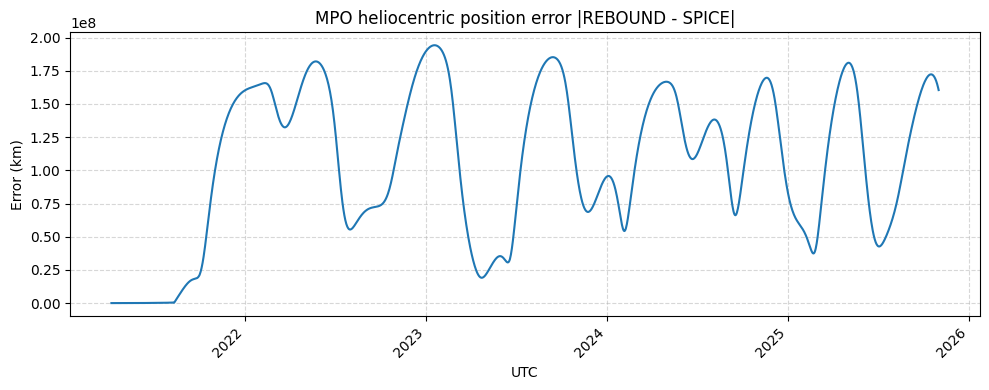

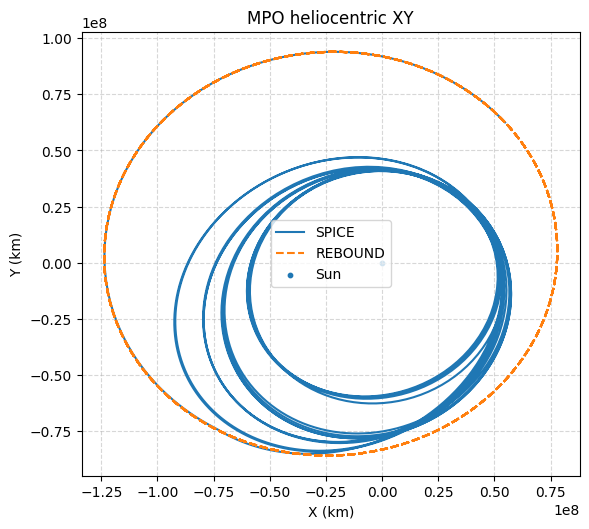

In [12]:
# --- compare only over ets_sub ---
utc_sub = np.array([spice.et2utc(et, "ISOC", 0) for et in ets_sub], dtype="datetime64")
mpo_spice_sub = xyz_mpo[900:]  # SPICE truth for same range

err = np.linalg.norm(mpo_reb - mpo_spice_sub, axis=1)

plt.figure(figsize=(10,4))
plt.plot(utc_sub, err)
plt.title("MPO heliocentric position error |REBOUND - SPICE|")
plt.xlabel("UTC"); plt.ylabel("Error (km)")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# quick XY plot
plt.figure(figsize=(6,6))
plt.plot(mpo_spice_sub[:,0], mpo_spice_sub[:,1], label="SPICE")
plt.plot(mpo_reb[:,0], mpo_reb[:,1], "--", label="REBOUND")
plt.scatter([0],[0], s=10, label="Sun")
plt.gca().set_aspect("equal", "box")
plt.xlabel("X (km)"); plt.ylabel("Y (km)")
plt.title("MPO heliocentric XY")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
spice.kclear()